# Traitement en pyspark

Octobre 2022, Mag 3

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 53.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2dc14c65b6f7bee73ac68afe4e3053a01c06a76bf2aa415c08b578a7331fb7f5
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import pyspark

## Création de la session Spark

In [ ]:
spark = pyspark.sql.SparkSession.builder.appName('Ma session').getOrCreate()

In [ ]:
spark

In [ ]:
!curl -O https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   754k      0 --:--:-- --:--:-- --:--:--  754k


In [ ]:
!ls -lh

total 68K
drwx------ 6 root root 4.0K Oct  8 06:28 drive
drwxr-xr-x 1 root root 4.0K Oct  5 13:35 sample_data
-rw-r--r-- 1 root root  59K Oct  8 06:29 titanic.csv


In [ ]:
# Commande linux pour regarder le début du fichier
!head titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


## Lecture du fichier CSV

In [ ]:
spark.read.csv('titanic.csv', sep=',', header=True)

DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]

In [ ]:
# Afficher les 5 premières lignes avec .show(5)
spark.read.csv('titanic.csv', sep=',', header=True).show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [ ]:
spark.read.csv('titanic.csv', sep=',', header=True, inferSchema=True)

DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

In [ ]:
titanic_ddf = spark.read.csv('titanic.csv', sep=',', header=True, inferSchema=True)

In [ ]:
titanic_ddf.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

## La structure du dataframe Spark

In [ ]:
titanic_ddf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



## Définition d'un schéma

In [ ]:
# https://dpaste.org/kgOFt

from pyspark.sql.types import *

titanic_schema = StructType([
    StructField('PassengerId', IntegerType(), False),
    StructField('Survived', IntegerType(), False),
    StructField('Pclass', IntegerType(), True),
    StructField('Name', StringType(), True),
    StructField('Sex', StringType(), True),
    StructField('Age', DoubleType(), True),
    StructField('SibSp', IntegerType(), True),
    StructField('Parch', IntegerType(), True),
    StructField('Ticket', StringType(), True),
    StructField('Fare', DoubleType(), True),
    StructField('Cabin', StringType(), True),
    StructField('Embarked', StringType(), True),
])

In [ ]:
spark.read.csv('titanic.csv', sep=',', header=True, schema=titanic_schema)

DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

## Les fonctions élémentaires d'un dataframe ❗

In [ ]:
# Nombre de lignes
titanic_ddf.count()

891

In [ ]:
# Afficher les premières lignes, sans troncature
titanic_ddf.show(5, truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)       |female|35.0|1    |0    |113803          |53

## Les fonctions de traitement de données

* compter les occurences
* calculer les statistiques de base
* calculer des corrélations
* calculer des nouvelles colonnes
* recoder des valeurs
* transformer des colonnes (standardisation, etc.)
* traiter les valeurs manquantes

Pour faire des graphiques, il faudra travailler avec pandas + matplotlib : Spark ne fait pas de graphique tout seul.

In [ ]:
titanic_ddf.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

### Transférer les données vers Python / Pandas

In [ ]:
# --- Spark ------------>---Python--->
titanic_ddf.describe().toPandas()

,summary,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,count,891,891,891,891,891,714,891,891,891,891,204,889
1,mean,446.0,0.3838383838383838,2.308641975308642,None,None,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,None,None
2,stddev,257.3538420152301,0.48659245426485753,0.8360712409770491,None,None,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,None,None
3,min,1,0,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0.0,A10,C
4,max,891,1,3,"van Melkebeke, Mr. Philemon",male,80.0,8,6,WE/P 5735,512.3292,T,S


In [ ]:
# On récupère bien un dataframe pandas
type(titanic_ddf.describe().toPandas())

pandas.core.frame.DataFrame

In [ ]:
# --- Spark ------------>..--------------Python/pandas----------->
titanic_ddf.describe().toPandas().set_index('summary').transpose()

summary,count,mean,stddev,min,max
PassengerId,891,446.0,257.3538420152301,1,891
Survived,891,0.3838383838383838,0.48659245426485753,0,1
Pclass,891,2.308641975308642,0.8360712409770491,1,3
Name,891,None,None,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""","van Melkebeke, Mr. Philemon"
Sex,891,None,None,female,male
Age,714,29.69911764705882,14.526497332334035,0.42,80.0
SibSp,891,0.5230078563411896,1.1027434322934315,0,8
Parch,891,0.38159371492704824,0.8060572211299488,0,6
Ticket,891,260318.54916792738,471609.26868834975,110152,WE/P 5735
Fare,891,32.2042079685746,49.69342859718089,0.0,512.3292


### Pas beau du tout 💣

In [ ]:
titanic_df = titanic_ddf.toPandas()

## Filtrer les lignes

Des instructions Spark.

In [ ]:
# Nombre de passagers mineurs
titanic_ddf.where('Age < 18').count()

# En pandas : titanic_df.query('Age < 18')

113

In [ ]:
titanic_ddf.where('Age < 18').count() / titanic_ddf.count()

0.12682379349046016

In [ ]:
titanic_ddf[titanic_ddf['Age'] < 18].count()

113

### Utilisation de l'opérateur col()

In [ ]:
# On aliase en F les fonctions Spark SQL
import pyspark.sql.functions as F

In [ ]:
# Comparer avec titanic_ddf[titanic_ddf['Age'] < 18].count()

# F.col(C) --> utiliser la colonne C du dataframe sur lequel l'instruction s'applique
# sans avoir à indiquer le nom du dataframe --> écriture plus générique

titanic_ddf[F.col('Age') < 18].count()

# En pandas : titanic_df[lambda _df: _df['Age'] < 18]

113

Attention en 🐼

In [ ]:
# A rapprocher en pandas de :
titanic_df[titanic_df['Age'] < 18]

# ou, bien mieux d'un point de vue généricité :
titanic_df[lambda _df: _df['Age'] < 18]

## Sélectionner des colonnes

In [ ]:
titanic_ddf.select('Survived', 'Age', 'Pclass').show(5)

+--------+----+------+
|Survived| Age|Pclass|
+--------+----+------+
|       0|22.0|     3|
|       1|38.0|     1|
|       1|26.0|     3|
|       1|35.0|     1|
|       0|35.0|     3|
+--------+----+------+
only showing top 5 rows



## Supprimer une colonne

In [ ]:
titanic_ddf.drop('Ticket').show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+-------+-----+--------+
only showing top 5 rows



In [ ]:
# On créé un nouveau df avec le résultat
withoutticket_ddf = titanic_ddf.drop('Ticket')

# Ou pour faire l'opération dans le df d'origine
titanic_ddf = titanic_ddf.drop('Ticket')

## Renommer les colonnes

In [ ]:
titanic_ddf.withColumnRenamed('Ticket', 'Place').show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|           Place|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

## Calculer une nouvelle colonne

In [ ]:
titanic_ddf.withColumn('Accompagnants', F.col('SibSp') + F.col('Parch')).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Accompagnants|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|            1|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|            1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|            0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|            1|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.0

Malheureusement, pour des raisons techniques, on ne peut pas affecter une colonne directement

In [ ]:
titanic_ddf['Accompagnants'] = titanic_ddf['SibSp'] + titanic_ddf['Parch']

TypeError: ignored

### Utiliser F.expr() pour simplifier l'écriture

In [ ]:
titanic_ddf.withColumn('Accompagnants', F.expr('SibSp + Parch')).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Accompagnants|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|            1|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|            1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|            0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|            1|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.0

In [ ]:
# On peut utiliser toutes les fonctions disponibles dans Spark
# Ici par exemple : https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

titanic_ddf.withColumn('Accompagnants', F.expr('SibSp + cos(Parch)')).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Accompagnants|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|          2.0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|          2.0|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|          1.0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|          2.0|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.0

## Regrouper et compter

In [ ]:
titanic_ddf.groupby('Pclass').agg(F.mean('Survived')).show()

+------+-------------------+
|Pclass|      avg(Survived)|
+------+-------------------+
|     1| 0.6296296296296297|
|     3|0.24236252545824846|
|     2|0.47282608695652173|
+------+-------------------+



In [ ]:
titanic_ddf.groupby('Pclass').agg(F.mean('Survived').alias('Taux de survie')).show()

+------+-------------------+
|Pclass|     Taux de survie|
+------+-------------------+
|     1| 0.6296296296296297|
|     3|0.24236252545824846|
|     2|0.47282608695652173|
+------+-------------------+



In [ ]:
# On regroupe par Pclass les individus
# Et sur chaque groupe, on calcule la moyenne de Survived et les effectifs

titanic_ddf.groupby('Pclass').agg(F.mean('Survived').alias('Taux de survie'),
                                  F.count('Survived').alias('Effectifs'),
                                  ).show()

+------+-------------------+---------+
|Pclass|     Taux de survie|Effectifs|
+------+-------------------+---------+
|     1| 0.6296296296296297|      216|
|     3|0.24236252545824846|      491|
|     2|0.47282608695652173|      184|
+------+-------------------+---------+



## Le truc de la parenthèse (_Parenthesis Trick_) 🧙

In [ ]:
(titanic_ddf
 .groupby('Pclass')
 .agg(
     F.mean('Survived').alias('Taux de survie'),
     F.count('Survived').alias('Effectif'),
     F.avg('Age').alias('Age moyen'),
 )
).show()

+------+-------------------+--------+------------------+
|Pclass|     Taux de survie|Effectif|         Age moyen|
+------+-------------------+--------+------------------+
|     1| 0.6296296296296297|     216|38.233440860215055|
|     3|0.24236252545824846|     491| 25.14061971830986|
|     2|0.47282608695652173|     184| 29.87763005780347|
+------+-------------------+--------+------------------+



In [ ]:
(titanic_ddf
 # Regroupement par classe
 .groupby('Pclass')

 # Calcul d'agrégats
 .agg(
     F.mean('Survived').alias('Taux de survie'),
     F.count('Survived').alias('Effectif'),
     F.avg('Age').alias('Age moyen'),
 )
).show()

+------+-------------------+--------+------------------+
|Pclass|     Taux de survie|Effectif|         Age moyen|
+------+-------------------+--------+------------------+
|     1| 0.6296296296296297|     216|38.233440860215055|
|     3|0.24236252545824846|     491| 25.14061971830986|
|     2|0.47282608695652173|     184| 29.87763005780347|
+------+-------------------+--------+------------------+



### Fonctionne aussi en 🐼 ! 

On parle parfois de _Modern pandas_.

In [ ]:
(titanic_df
 .groupby('Pclass')
 .agg(
     taux_survie=('Survived', 'mean'),
     effectif=('Survived', 'count'),
     #age_moyen=('Age', 'mean'),
 )
)

,taux_survie,effectif
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


## Utilisation du SQL

In [ ]:
# Une requête SQL type
"""
SELECT colonne, ...., colonne
FROM table
WHERE condition
GROUP BY
ORDER BY
"""

In [ ]:
# On associe le dataframe Spark titanic_ddf au nom de table SQL titanic
# Cela crée une sorte d'alias pour utiliser titanic_ddf dans des requêtes SQL
# 1 dataframe == 1 table SQL

titanic_ddf.createOrReplaceTempView('titanic')

In [ ]:
spark.sql("""
SELECT *
FROM titanic
""").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [ ]:
# titanic_ddf.where('Age < 18').count()

spark.sql("""
SELECT count(*) as nb_mineurs
FROM titanic
WHERE age < 18
""").show(5)

+----------+
|nb_mineurs|
+----------+
|       113|
+----------+



In [ ]:
# Notation fonctionnelle
# (titanic_ddf
#  .groupby('Pclass')
#  .agg(
#      F.mean('Survived').alias('Taux de survie'),
#      F.count('Survived').alias('Effectif'),
#      F.avg('Age').alias('Age moyen'),
#  )
# ).show()

# Notation "relationnelle"
spark.sql("""
SELECT
  Pclass,
  avg(Survived) as Taux_survie,
  count(Survived) as Effectif,
  avg(Age) as Age_moyen
FROM titanic
GROUP BY Pclass
""").show()

+------+-------------------+--------+------------------+
|Pclass|        Taux_survie|Effectif|         Age_moyen|
+------+-------------------+--------+------------------+
|     1| 0.6296296296296297|     216|38.233440860215055|
|     3|0.24236252545824846|     491| 25.14061971830986|
|     2|0.47282608695652173|     184| 29.87763005780347|
+------+-------------------+--------+------------------+



### Mélange du SQL et du fonctionnel

In [ ]:
spark.sql("""
SELECT
  Pclass,
  avg(Survived) as Taux_survie,
  count(Survived) as Effectif,
  avg(Age) as Age_moyen
FROM titanic
GROUP BY Pclass
""").drop('Age_moyen').show()

+------+-------------------+--------+
|Pclass|        Taux_survie|Effectif|
+------+-------------------+--------+
|     1| 0.6296296296296297|     216|
|     3|0.24236252545824846|     491|
|     2|0.47282608695652173|     184|
+------+-------------------+--------+



In [ ]:
spark.sql("""
SELECT
  Pclass,
  avg(Survived) as Taux_survie,
  count(Survived) as Effectif,
  avg(Age) as Age_moyen
FROM titanic
GROUP BY Pclass
""").orderBy('Pclass').show()

+------+-------------------+--------+------------------+
|Pclass|        Taux_survie|Effectif|         Age_moyen|
+------+-------------------+--------+------------------+
|     1| 0.6296296296296297|     216|38.233440860215055|
|     2|0.47282608695652173|     184| 29.87763005780347|
|     3|0.24236252545824846|     491| 25.14061971830986|
+------+-------------------+--------+------------------+



La requête SQL est une chaîne de caractères. Donc on peut ajouter des paramètres.

In [ ]:
nom_taux_survie = 'Taux_de_survie'

spark.sql(f"""
SELECT
  Pclass,
  avg(Survived) as {nom_taux_survie},
  count(Survived) as Effectif,
  avg(Age) as Age_moyen
FROM titanic
GROUP BY Pclass
ORDER BY Pclass
""").show()

+------+-------------------+--------+------------------+
|Pclass|     Taux_de_survie|Effectif|         Age_moyen|
+------+-------------------+--------+------------------+
|     1| 0.6296296296296297|     216|38.233440860215055|
|     2|0.47282608695652173|     184| 29.87763005780347|
|     3|0.24236252545824846|     491| 25.14061971830986|
+------+-------------------+--------+------------------+



## Utilisation des fonctions analytiques

In [ ]:
spark.sql("""
SELECT
  PassengerId,
  Age,
  Sex,
  AVG(Age) OVER (PARTITION BY Sex) as Age_moyen_sex
FROM titanic
ORDER BY PassengerId
""").show(5)

+-----------+----+------+------------------+
|PassengerId| Age|   Sex|     Age_moyen_sex|
+-----------+----+------+------------------+
|          1|22.0|  male| 30.72664459161148|
|          2|38.0|female|27.915708812260537|
|          3|26.0|female|27.915708812260537|
|          4|35.0|female|27.915708812260537|
|          5|35.0|  male| 30.72664459161148|
+-----------+----+------+------------------+
only showing top 5 rows



Equivalent en 🐼

In [ ]:
titanic_df.merge(
    titanic_df.groupby('Sex').agg(Age_moyen_sex=('Age', 'mean')).reset_index(),
    on='Sex'
    )[['PassengerId', 'Age', 'Sex', 'Age_moyen_sex']].sort_values('PassengerId').head(5)

,PassengerId,Age,Sex,Age_moyen_sex
0,1,22.0,male,30.726645
577,2,38.0,female,27.915709
578,3,26.0,female,27.915709
579,4,35.0,female,27.915709
1,5,35.0,male,30.726645


## Apprentissage (_Machine Learning_)

In [ ]:
titanic_ddf.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
spark.sql("""
SELECT 
  Embarked,
  AVG(Survived) as Survived,
  COUNT(Survived) as Effectif
FROM titanic
GROUP BY Embarked
""").show()

+--------+-------------------+--------+
|Embarked|           Survived|Effectif|
+--------+-------------------+--------+
|       Q|0.38961038961038963|      77|
|    null|                1.0|       2|
|       C| 0.5535714285714286|     168|
|       S|0.33695652173913043|     644|
+--------+-------------------+--------+



In [ ]:
from pyspark.ml.feature import StringIndexer # chaîne -> nombre
from pyspark.ml.feature import OneHotEncoder # 0, 1, .. n -> vecteur binaire
from pyspark.ml.feature import Imputer # remplace les valeurs manquantes
from pyspark.ml.feature import VectorAssembler # concatène les variables
from pyspark.ml.pipeline import Pipeline # combine les outils

In [ ]:
# On évite les imports * comme :
# from pyspark.ml.feature import *

# Les avis sont partagés entre 
# 1 ligne par objet
# 1 ligne pour un module : from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [ ]:
# Les variables X à utiliser
# 'Pclass' -> telle quelle, en numérique
# 'Sex', -> encodage numérique, une colonne
# 'Age', -> tel quel, en numérique, remplacement des valeurs manquantes
# 'SibSp', -> tel quel
# 'Parch', -> tel quel
# 'Fare', -> tel quel
# 'Embarked' -> OHE, remplacement des valeurs manquantes [ou dropna()]

In [ ]:
titanic_ddf.describe().where('summary == "count"').show()

+-------+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|summary|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-------+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|  count|        891|     891|   891| 891|891|714|  891|  891|   891| 891|  204|     889|
+-------+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [ ]:
nsex = StringIndexer(inputCol='Sex', outputCol='nsex')
nage = Imputer(inputCol='Age', outputCol='nage', strategy='mean')
nembarked = StringIndexer(inputCol='Embarked',
                          outputCol='nembarked',
                          handleInvalid='skip', # supprime les lignes à valeur manquante sur Embarked
                          )
ohe_embarked = OneHotEncoder(inputCol='nembarked', outputCol='oheembarked')

vector = VectorAssembler(inputCols=['Pclass', 'nsex', 'nage', 'SibSp', 'Parch', 'Fare', 'oheembarked'],
                         outputCol='features',
                         )

pipeline = Pipeline(stages=[nsex, nage, nembarked, ohe_embarked, vector])

In [ ]:
# fit : prépare le pipeline sur les données (calcul de la moyenne, comptage des modalités, etc.)
# transform : applique les transformations au dataframe et renvoie le dataframe transformé
pipeline.fit(titanic_ddf).transform(titanic_ddf).show(8, truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+-----------------+---------+-------------+------------------------------------------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|nsex|nage             |nembarked|oheembarked  |features                                  |
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+-----------------+---------+-------------+------------------------------------------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |0.0 |22.0             |0.0      |(2,[0],[1.0])|[3.0,0.0,22.0,1.0,0.0,7.25,1.0,0.0]       |
|2          |1       |1     |Cumings, Mrs. John Bradley 

# Modélisation

In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

In [ ]:
logreg = LogisticRegression(labelCol='Survived')
pipeline_logreg = Pipeline(stages=[nsex, nage, nembarked, ohe_embarked, vector, logreg])

In [ ]:
model_logreg = pipeline_logreg.fit(titanic_ddf)

In [ ]:
model_logreg

PipelineModel_934556b8862c

### Accéder à la logistique entraînée

In [ ]:
model_logreg.stages[-1]

LogisticRegressionModel: uid=LogisticRegression_3fecfbf42783, numClasses=2, numFeatures=8

In [ ]:
# 'Pclass', 'nsex', 'nage', 'SibSp', 'Parch', 'Fare', 'oheembarked' -> S/C/Q
model_logreg.stages[-1].coefficients

DenseVector([-1.1001, 2.7187, -0.0399, -0.3258, -0.0926, 0.0019, -0.3847, 0.0341])

In [ ]:
model_logreg.stages[-1].intercept

2.5324183577124084

In [ ]:
list(zip(['Pclass', 'nsex', 'nage', 'SibSp', 'Parch', 'Fare', 'oheembarked_S', 'oheembarked_C'],
         model_logreg.stages[-1].coefficients))

[('Pclass', -1.1000586479456775),
 ('nsex', 2.7186962954690537),
 ('nage', -0.039900712313497136),
 ('SibSp', -0.3257760651555667),
 ('Parch', -0.09260288339796707),
 ('Fare', 0.001918251302387119),
 ('oheembarked_S', -0.38474178023286354),
 ('oheembarked_C', 0.034075742530062)]

In [ ]:
pd.DataFrame(list(zip(['Pclass', 'nsex', 'nage', 'SibSp', 'Parch', 'Fare', 'oheembarked_S', 'oheembarked_C'],
                      model_logreg.stages[-1].coefficients)))

,0,1
0,Pclass,-1.100059
1,nsex,2.718696
2,nage,-0.039901
3,SibSp,-0.325776
4,Parch,-0.092603
5,Fare,0.001918
6,oheembarked_S,-0.384742
7,oheembarked_C,0.034076


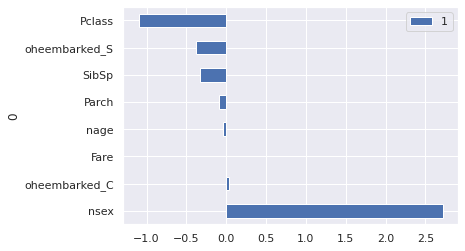

In [ ]:
#https://dpaste.org/1cVB1

import pandas as pd
import seaborn as sns

sns.set()

(pd.DataFrame(list(zip(['Pclass', 'nsex', 'nage', 'SibSp', 'Parch', 'Fare', 'oheembarked_S', 'oheembarked_C'],
                      model_logreg.stages[-1].coefficients)))
  .set_index(0)
  .sort_values(1, ascending=False)
  .plot.barh());

### Partionnement apprentissage - test

In [ ]:
train_ddf, test_ddf = titanic_ddf.randomSplit([2.0, 1.0]) # Split 2/3 1/3

In [ ]:
train_ddf.count(), test_ddf.count(), train_ddf.count() + test_ddf.count()

(601, 290, 891)

In [ ]:
# On entraine, fit(), sur le train set
# On applique, transform(), sur le test set

model_trained = pipeline_logreg.fit(train_ddf)
model_trained.transform(test_ddf).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|   Fare|Cabin|Embarked|nsex|nage|nembarked|  oheembarked|            features|       rawPrediction|         probability|prediction|
+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0| 17463|51.8625|  E46|       S| 0.0|54.0|      0.0|(2,[0],[1.0])|(8,[0,2,5,6],[1.0...|[1.12253000459919...|[0.75445770470524...|       0.0|
|         14|       0|     3|Andersson, Mr. An...|  male|39.0|    1|    5|347082| 31.275| null|       S| 0.0|39.0|      0.0|(2,[0],[1.0])|[3.0,0.0,3

### Evaluation de la performance

In [ ]:
results_ddf = model_trained.transform(test_ddf)

In [ ]:
results_ddf.where('Survived == Prediction').count() / results_ddf.count()

0.8137931034482758

In [ ]:
results_ddf.show(5, truncate=False)

+-----------+--------+------+------------------------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+-------------------------------------+----------------------------------------+----------------------------------------+----------+
|PassengerId|Survived|Pclass|Name                                |Sex   |Age |SibSp|Parch|Ticket|Fare   |Cabin|Embarked|nsex|nage|nembarked|oheembarked  |features                             |rawPrediction                           |probability                             |prediction|
+-----------+--------+------+------------------------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+-------------------------------------+----------------------------------------+----------------------------------------+----------+
|7          |0       |1     |McCarthy, Mr. Timothy J             |male  |54.0|0    |0    |17463 |51.8625|E46  |S       |0.0 |54.0|0.0      |(2

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Par défaut, la métrique est l'AUC ROC
evaluator = BinaryClassificationEvaluator(labelCol='Survived',
                                          rawPredictionCol='rawPrediction',
                                          metricName='areaUnderPR')

evaluator.getMetricName(), evaluator.evaluate(results_ddf)

('areaUnderPR', 0.8678994233744037)

## Utilisation d'une random forest

In [ ]:
random_forest = RandomForestClassifier(labelCol='Survived')
pipeline_random_forest = Pipeline(stages=[nsex, nage, nembarked, ohe_embarked, vector, random_forest])

In [ ]:
# On entraine, fit(), sur le train set
# On applique, transform(), sur le test set

model_trained_rf = pipeline_random_forest.fit(train_ddf)
model_trained_rf.transform(test_ddf).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|   Fare|Cabin|Embarked|nsex|nage|nembarked|  oheembarked|            features|       rawPrediction|         probability|prediction|
+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0| 17463|51.8625|  E46|       S| 0.0|54.0|      0.0|(2,[0],[1.0])|(8,[0,2,5,6],[1.0...|[14.6892531206036...|[0.73446265603018...|       0.0|
|         14|       0|     3|Andersson, Mr. An...|  male|39.0|    1|    5|347082| 31.275| null|       S| 0.0|39.0|      0.0|(2,[0],[1.0])|[3.0,0.0,3

In [ ]:
# Application de la RF à l'ensemble de test
results_rf_ddf = model_trained_rf.transform(test_ddf)

In [ ]:
# Calcul de la métrique sur le test set (résultats)
evaluator.getMetricName(), evaluator.evaluate(results_rf_ddf)

('areaUnderPR', 0.8798448444863323)

## Validation croisée avec Spark

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
# On construit la grille des hyperparamètres

rf_paramGrid = (ParamGridBuilder()
                .addGrid(random_forest.numTrees, [10, 20, 50]) # On teste 10, 20 et 50 arbres
                .addGrid(random_forest.maxDepth, [2, 5, 8]).build()) # On teste une profondeur de 2, 5 et 8 niveaux

In [ ]:
crossval = CrossValidator(
    estimator=pipeline_random_forest,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=5
)

In [ ]:
%%time
cv_rf_model = crossval.fit(titanic_ddf)

CPU times: user 8.81 s, sys: 1.95 s, total: 10.8 s
Wall time: 1min 58s


In [ ]:
# On récupère les paramètres de la RF
# dans le meilleur modèle (.bestModel)
# la RF est le dernier stages du pipeline (stages[-1])
# et on extrait les paramètres
cv_rf_model.bestModel.stages[-1].extractParamMap()

{Param(parent='RandomForestClassifier_2de152395a51', name='bootstrap', doc='Whether bootstrap samples are used when building trees.'): True,
 Param(parent='RandomForestClassifier_2de152395a51', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False,
 Param(parent='RandomForestClassifier_2de152395a51', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10,
 Param(parent='RandomForestClassifier_2de152395a51', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supp

In [ ]:
cv_rf_model.bestModel.transform(test_ddf).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|   Fare|Cabin|Embarked|nsex|nage|nembarked|  oheembarked|            features|       rawPrediction|         probability|prediction|
+-----------+--------+------+--------------------+------+----+-----+-----+------+-------+-----+--------+----+----+---------+-------------+--------------------+--------------------+--------------------+----------+
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0| 17463|51.8625|  E46|       S| 0.0|54.0|      0.0|(2,[0],[1.0])|(8,[0,2,5,6],[1.0...|[15.1356308664362...|[0.75678154332181...|       0.0|
|         14|       0|     3|Andersson, Mr. An...|  male|39.0|    1|    5|347082| 31.275| null|       S| 0.0|39.0|      0.0|(2,[0],[1.0])|[3.0,0.0,3